**Algerian Forest Fires Dataset**


The Algerian Forest Fires dataset has 244 instances of data that is divided into two different regions. One is Bejaia Region that has 122 instances of data and the other is Sidi-Bel Region that has anothar 122 instances of data.


Bejaia Region is considered as Region 0 and Sidi-Bel Region is considered as Region 1.


The time period of the dataset is from June 2012 till september 2012. This dataset has total 11 independent attributes and 1 dependent(output) attribute.


**Aim of this project:**

The main objective of this project is to predict the Fire Weather Index for all the given input attributes based on some Regression Algorithms.


**Attribute Information:**

(i) Date(DD/MM/YYYY) -> DD = Day, MM = Month, YY = Year, Weather Data Observations.

(ii) Temperature -> Temperature in Degree Celcius.

(iii) RH -> Relative Humidity

(iv) Ws -> Wind Speed in km/hr.

(v) Rain -> total rain received in mm.

(vi) FFMC -> (Fine Fuel Moisture Code) index received from FWI system: 28.6 to 92.5

(vii) DMC -> (Duff Moisture Code) index received from FWI system : 1.1 to 65.9

(viii) DC -> (Drought Code) index received from FWI system: 7 to 220.4

(ix) ISI -> (Initial Speed Index) received from FWI system: 0 to 18.5

(x) BUI -> (Buildup Index) received from FWI system: 1.1 to 6.8

(xi) FWI -> (Fire Weather Index) 0 to 31.1

(xii) Classes -> Fire and Not Fire.

**1. DATA GATHERING AND DATA INFORMATION:**

In [104]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
# loading the dataset
data = pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

In [106]:
# load the first five records of the dataset
print(data.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [107]:
# load the last five records of the datset
print(data.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
238  6.5       fire          1  
239  0.0   not fire          1  
240  0.2   not fire          1  
241  0.7   not fire          1  
242  0.5  not fire           1  


In [108]:
# depict the shape of the dataset
print(data.shape)

(243, 15)


In [109]:
# Get the information about all the columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [110]:
# Get the statistical summary about the dataset
print(data.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [111]:
# load the entire dataset
print(data)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Reg

**2. EXPLORATORY DATA ANALYSIS:**

In [112]:
# Checking for the missing values in the dataset
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


**OBSERVATIONS:**

(i) From the above data, it is clear that there are no missing values in the dataset.

**DATASET INFO:**

(i) The dataset is divided into two different regions. One is Bejaia Region from 0 to 122 index.

(ii) Sidi-Bel Region from 123 to 244 index.

In [113]:
# Get the information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [114]:
# convert all the columns into object type
data[['day']]                =    data[['day']].astype('object')
data[['month']]              =    data[['month']].astype('object')
data[['year']]               =    data[['year']].astype('object')
data[['Temperature']]        =    data[['Temperature']].astype('object')
data[['RH']]                 =    data[['RH']].astype('object')
data[['Ws']]                 =    data[['Ws']].astype('object')


data[['Rain']]               =    data[['Rain']].astype('object')
data[['FFMC']]               =    data[['FFMC']].astype('object')
data[['DMC']]                =    data[['DMC']].astype('object')
data[['DC']]                 =    data[['DC']].astype('object')
data[['ISI']]                =    data[['ISI']].astype('object')
data[['BUI']]                =    data[['BUI']].astype('object')
data[['FWI']]                =    data[['FWI']].astype('object')


data[['Region']]             =    data[['Region']].astype('object')

In [115]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB
None


In [116]:
# change the data type of the columns into their respective data types
data[['day']]                =    data[['day']].astype('int64')
data[['month']]              =    data[['month']].astype('int64')
data[['year']]               =    data[['year']].astype('int64')
data[['Temperature']]        =    data[['Temperature']].astype('int64')
data[['RH']]                 =    data[['RH']].astype('int64')
data[['Ws']]                 =    data[['Ws']].astype('int64')


data[['Rain']]               =    data[['Rain']].astype('float64')
data[['FFMC']]               =    data[['FFMC']].astype('float64')
data[['DMC']]                =    data[['DMC']].astype('float64')
data[['DC']]                 =    data[['DC']].astype('float64')
data[['ISI']]                =    data[['ISI']].astype('float64')
data[['BUI']]                =    data[['BUI']].astype('float64')
data[['FWI']]                =    data[['FWI']].astype('float64')


data[['Region']]             =    data[['Region']].astype('int64')

In [117]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [118]:
print(data.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [119]:
# checking for the missing values in the dataset
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [120]:
# get the information at index 122
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [121]:
# Get all the columns from the dataset
print(data.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [122]:
# fixing the spaces in the column names
data.columns = data.columns.str.strip()

In [123]:
print(data.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [124]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [125]:
print(data.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [126]:
# drop day, month and year from the dataset

df_copy = data.drop((['day','month','year']), axis = 1)

In [127]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [128]:
# Categories in Classes
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [129]:
# Encoding of the Categories in the Classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [130]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

**OBSERVATIONS:**


(i) There are total 137 entities in the fire class and 106 entities in the not fire class of the dataset.



In [131]:
# display the first five records of the dataset
print(df_copy.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0


In [132]:
# display the last five records of the dataset
print(df_copy.tail())

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
238       1  
239       1  
240       1  
241       1  
242       1  


<ipython-input-133-1d6467d84698>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


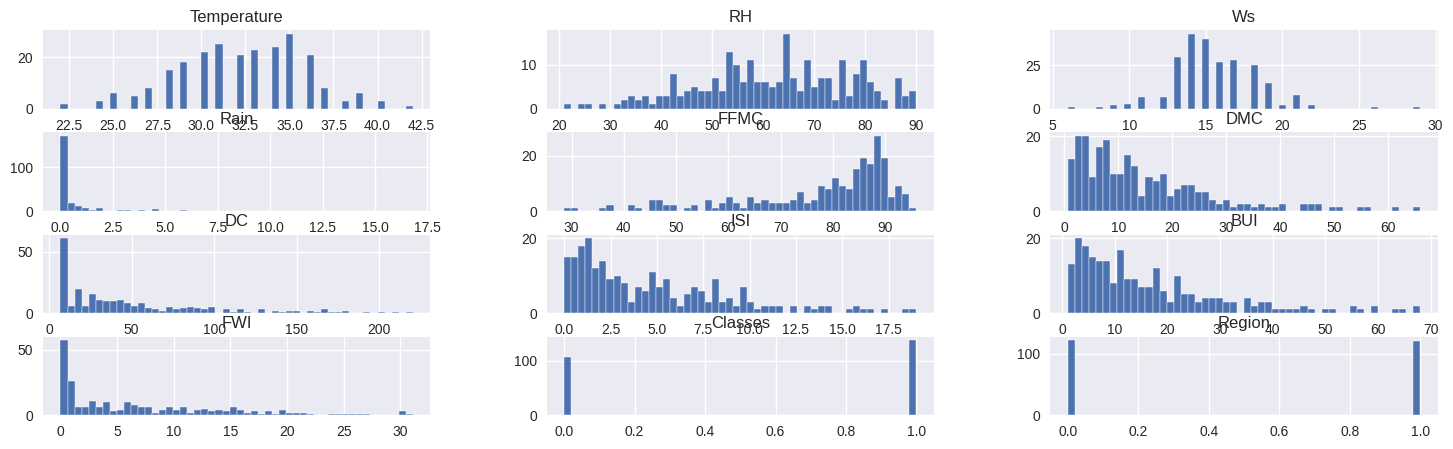

In [133]:
# Plot the density plot for all the features
plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize = (18,5))
plt.show()

In [134]:
# Percentage of the Pie Class
percen = df_copy['Classes'].value_counts(normalize = True)* 100.0

In [135]:
print(percen)

1    56.378601
0    43.621399
Name: Classes, dtype: float64


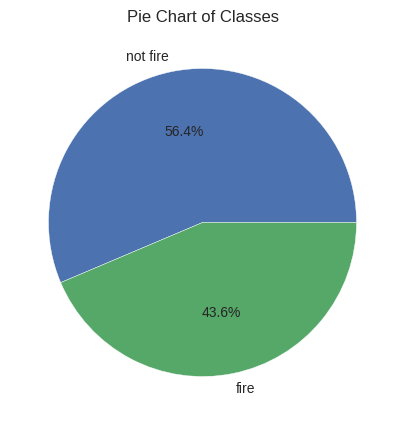

In [136]:
# Plotting for the pie chart of classes

classlabels = ['not fire', 'fire']

plt.figure(figsize = (10,5))

plt.pie(percen, labels = classlabels, autopct = '%1.1f%%')

plt.title('Pie Chart of Classes')

plt.show()

**OBSERVATION:**

(i) 56.4% of the Algerian Forest is not covered with Forest Fires.

(ii) 43.6% of the Algerian Forest is covered with Forest Fires.

**CORRELATION:**

In [137]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

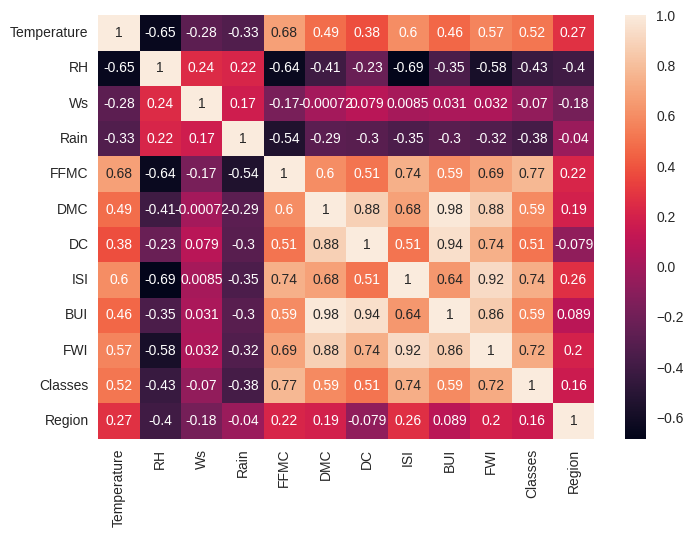

In [138]:
# plot a heatmap for the above correlation data
sns.heatmap(df_copy.corr(), annot = True)

**OBSERVATION:**

(i) Here the above graph depicts the numerical relationship between every feature with another feature in the form of heatmap.

<Axes: ylabel='FWI'>

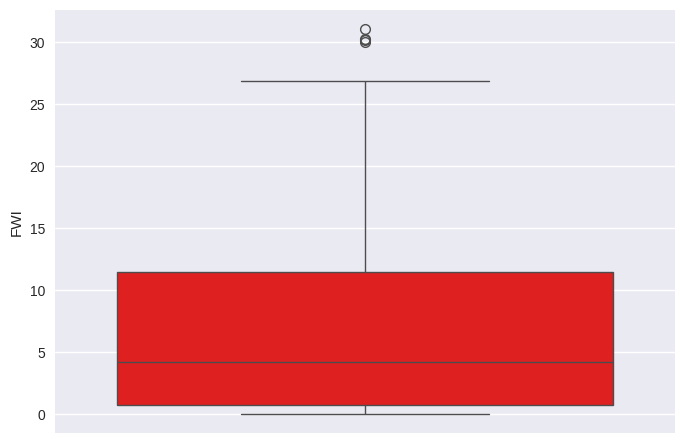

In [139]:
# perform the boxplot for FWI attribute of the dataset

sns.boxplot(df_copy['FWI'], color = 'red')

**OBSERVATIONS:**

There are some outlier values for FWI(Fire Weather Index) attribute of the given dataset.

In [140]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [141]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [142]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [143]:
data.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Region')

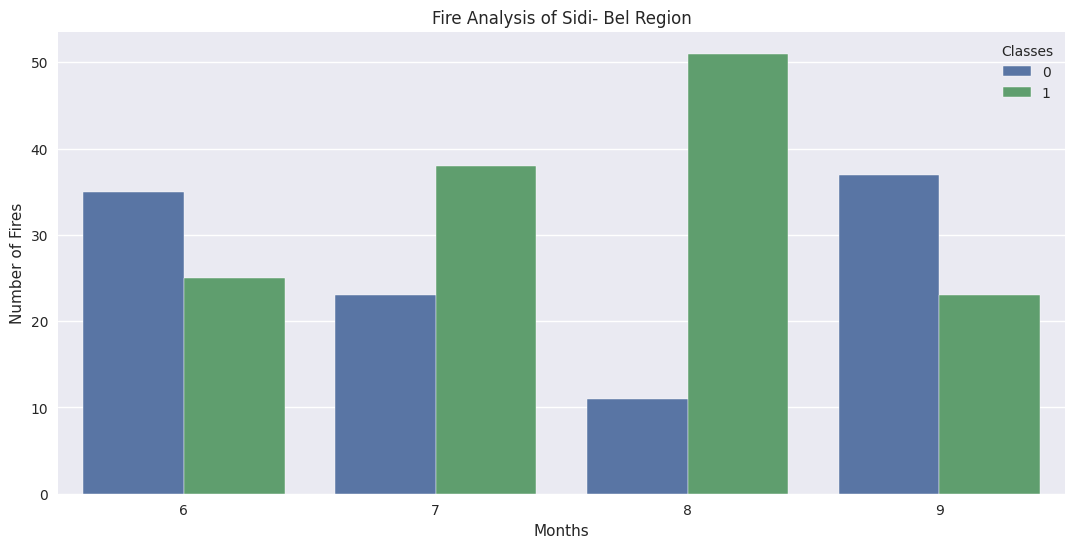

In [144]:
# Monthly Fire Analysis

dtemp = data[data['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'month', hue = 'Classes')
plt.xlabel('Months')
plt.ylabel('Number of Fires')
plt.title('Fire Analysis of Sidi- Bel Region')

**OBSERVATIONS:**

(i) Maximum Forest Fires for Sidi-Bel Region has been caught in the month of August.

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

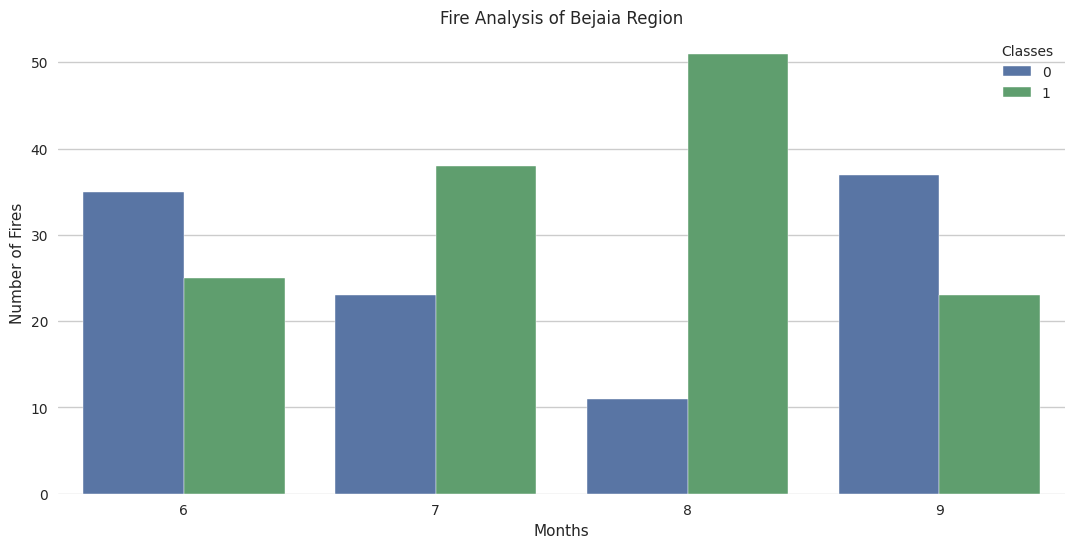

In [145]:
dtemp = data[data['Region'] == 0]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'month', hue = 'Classes')
plt.xlabel('Months')
plt.ylabel('Number of Fires')
plt.title('Fire Analysis of Bejaia Region')

OBSERVATIONS:

(i) Maximum Forest Fires for Bejaia Region has been caught in the month of August.

**3. MODEL TRAINING**

In [146]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [147]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [148]:
# Divide the dataset into independent and dependent features
X = df_copy.drop('FWI', axis = 1)

Y = df_copy['FWI']

In [149]:
print(X)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]


In [150]:
print(Y)

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64


In [151]:
# Divide the dataset into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [152]:
print("Input Features are :", X_train.shape, X_test.shape)

Input Features are : (182, 11) (61, 11)


In [153]:
print("Output Features are:", Y_train.shape, Y_test.shape)

Output Features are: (182,) (61,)


In [154]:
print(X_train)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       0
141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       1
192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       1
68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       0
119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       0
..           ...  ..  ..   ...   ...   ...   ...   ...   ...      ...     ...
106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4        0       0
14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0        0       0
92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8        0       0
179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5        1       1
102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4        0       0

[182 rows x 11 columns]


In [155]:
print(X_test)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
24            31  64  15   0.0  86.7  14.2  63.8  5.7  18.3        1       0
6             33  54  13   0.0  88.2   9.9  30.5  6.4  10.9        1       0
152           28  58  18   2.2  63.7   3.2   8.5  1.2   3.3        0       1
232           34  58  13   0.2  79.5  18.7  88.0  2.1  24.4        0       1
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
162           34  56  15   2.9  74.8   7.1   9.5  1.6   6.8        0       1
178           33  57  16   0.0  87.5  15.7  37.6  6.7  15.7        1       1
224           31  72  14   0.0  84.2   8.3  25.2  3.8   9.1        1       1
230           36  33  13   0.1  90.6  25.8  77.8  9.0  28.2        1       1
154           34  56  17   0.1  84.7   9.7  27.3  4.7  10.3        1       1

[61 rows x 11 columns]


In [156]:
print(Y_train)

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 182, dtype: float64


In [157]:
# Find the correlation
print(X_train.corr())

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  

<Axes: >

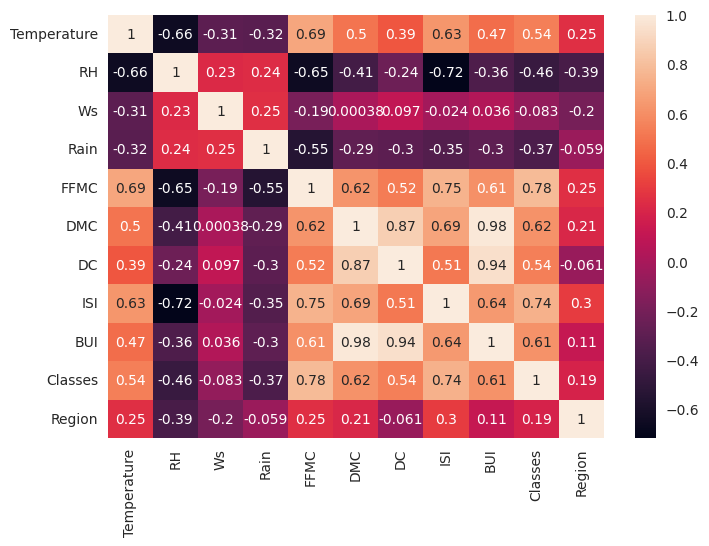

In [158]:
# Perform the heatmap for the above correlation data
import seaborn as sns
sns.heatmap(X_train.corr(), annot = True)

In [159]:
# fetch all the columns whose correlation value is greater than 0.85

corr_dataset = X_train.corr()

In [160]:
print(corr_dataset)

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  

In [161]:
# fetch all the columns whose correlation value is greater than 85 %
def correlat(dataset, threshold):
  corr_matrix = set()


  for i in range(len(corr_dataset.columns)):
    for j in range(i):
      if abs(corr_dataset.iloc[i,j] > threshold):
        colname = corr_dataset.columns[i]
        corr_matrix.add(colname)
  return(corr_matrix)

In [162]:
corr_features = correlat(X_train,0.85)

In [163]:
print(corr_features)

{'DC', 'BUI'}


In [164]:
## drop features when correlation is more than 0.85
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [165]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0,1
178,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,1,1
224,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,1
230,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,1,1


In [166]:
X_train.drop(corr_features, axis = 1, inplace = True)

In [167]:
X_test.drop(corr_features, axis = 1, inplace = True)

In [168]:
print(X_train.shape, X_test.shape)

(182, 9) (61, 9)


**FEATURE SCALING OR STANDARDIZATION:**

In [169]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

In [170]:
print(X_train_scaled)

[[-0.84284248  0.78307967  1.29972026 ... -0.62963326 -1.10431526
  -0.98907071]
 [-0.30175842  0.64950844 -0.59874754 ... -0.93058524 -1.10431526
   1.01105006]
 [ 2.13311985 -2.08870172 -0.21905398 ...  2.7271388   0.90553851
   1.01105006]
 ...
 [-1.9250106   0.9166509   0.54033314 ... -1.06948615 -1.10431526
  -0.98907071]
 [ 0.50986767 -0.21870454  0.16063958 ...  0.5973248   0.90553851
   1.01105006]
 [-0.57230045  0.98343651  2.05910739 ... -0.86113478 -1.10431526
  -0.98907071]]


In [171]:
X_test_scaled = sc.transform(X_test)

In [172]:
print(X_test_scaled)

[[-3.01758418e-01  1.15223531e-01 -2.19053977e-01 -3.84060174e-01
   6.33218240e-01 -4.25075679e-02  2.03772218e-01  9.05538514e-01
  -9.89070710e-01]
 [ 2.39325642e-01 -5.52632606e-01 -9.78441098e-01 -3.84060174e-01
   7.37980727e-01 -3.83352062e-01  3.65823283e-01  9.05538514e-01
  -9.89070710e-01]
 [-1.11338451e+00 -2.85490151e-01  9.20026704e-01  6.45241658e-01
  -9.73139891e-01 -9.14435344e-01 -8.37984627e-01 -1.10431526e+00
   1.01105006e+00]
 [ 5.09867672e-01 -2.85490151e-01 -9.78441098e-01 -2.90487280e-01
   1.30358303e-01  3.14190159e-01 -6.29633258e-01 -1.10431526e+00
   1.01105006e+00]
 [-5.72300448e-01  1.82009145e-01 -5.98747538e-01 -3.84060174e-01
   5.42424085e-01  1.00171523e-01 -7.40296073e-02  9.05538514e-01
   1.01105006e+00]
 [ 1.86257782e+00  1.15223531e-01 -2.49721534e+00  1.77377189e-01
  -2.67739147e-01 -2.40672972e-01 -8.61134779e-01 -1.10431526e+00
   1.01105006e+00]
 [-1.11338451e+00  8.49865282e-01  1.60639583e-01 -3.84060174e-01
   3.18930780e-01 -8.1931595

**BOX PLOTS TO UNDERSTAND THE EFFECTS OF STANDARD SCALER:**

<ipython-input-173-cf2a66116463>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

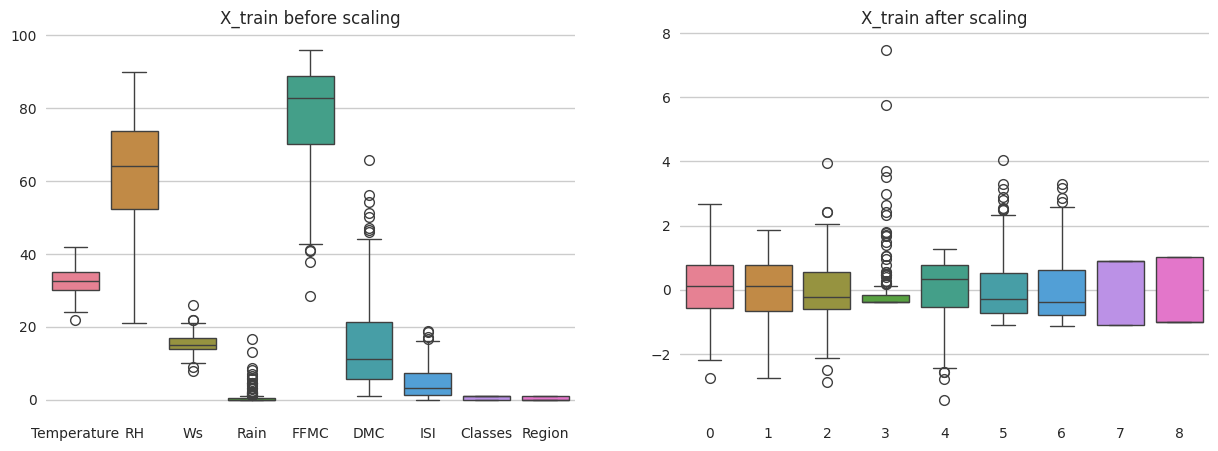

In [173]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')


plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')

**4. APPLYING ALGORITHMS TO TEST THE ACCURACY OF THE MODEL:**



**(i) LINEAR REGRESSION MODEL:**

In [174]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

# fit the model
lin.fit(X_train_scaled, Y_train)

# predict the output for the model
pred_y = lin.predict(X_test_scaled)

In [175]:
print(pred_y)

[ 8.22340505e+00  7.75252922e+00 -2.54117416e-01  4.35589319e+00
  6.69135945e+00  1.36202538e+00  2.03864111e+00  7.79328670e+00
  1.72547890e+00  3.33158516e+00  4.13723043e-01  9.75001593e+00
  9.33180880e+00  1.70522541e+01  1.85133518e+01  1.24250301e+00
  1.85818589e+00 -2.19341618e-02  7.18794479e+00  3.06137615e+00
  1.43702876e+00  2.31135272e-01  6.57677437e+00  3.31761969e-01
  2.10846121e+01  5.11915298e+00  5.93220317e+00  9.80969813e+00
 -6.46764212e-02  9.81330986e+00  6.64475980e+00 -4.53909646e-01
  1.04015941e+01  1.45820244e+01  1.47807316e+00  4.33773546e-01
  2.04109845e+00  6.08454570e+00 -4.65467631e-01 -3.05185642e-01
  6.68439528e+00  1.79727675e+00  8.59237254e+00 -2.66715046e-01
  1.54439592e+01  8.32647113e+00  8.25849719e+00  1.42038134e+00
  1.29740729e+01  1.21912915e+00  2.95190998e+01  5.55199228e+00
  1.72874204e+01  1.94724900e+01  1.38380222e+01  1.62042933e+01
  6.42051336e-01  9.01702561e+00  3.62733209e+00  1.46170820e+01
  5.18049032e+00]


0.5468236465249986
Accuracy of the model is: 98.47657384266951


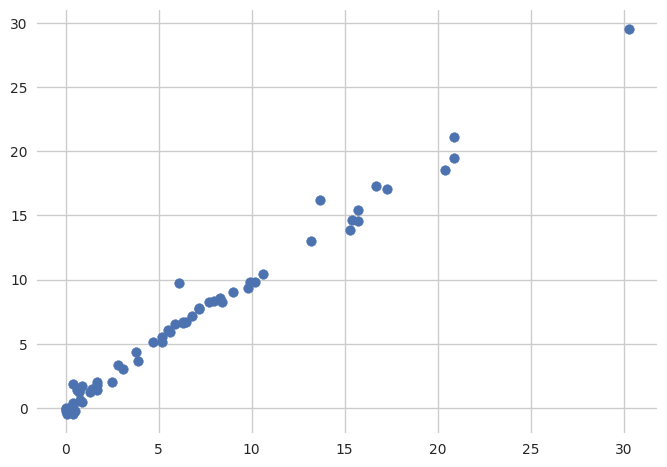

In [176]:
# find out the mean abolute error between the actual output and predicted output

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y)

print(mae)

from sklearn.metrics import r2_score


acc = r2_score(Y_test, pred_y)

print("Accuracy of the model is:", (acc * 100.0))

# To perform the scatter plot between the testing data

plt.scatter(Y_test, pred_y)

**(ii) LASSO REGRESSION**

In [177]:
from sklearn.linear_model import Lasso

las = Lasso()

# fit  the model
las.fit(X_train_scaled, Y_train)


# predict the model
pred_y_lasso = las.predict(X_test_scaled)


In [178]:
print(pred_y_lasso)

[ 7.84570511  7.4760351   1.06280248  5.57182566  7.15885302  2.98472993
  3.29585571  7.88757659  2.64885633  3.93029159  1.49954269  9.90939713
  9.38584995 15.7567602  16.31754696  2.94285845  2.56817739 -0.40623463
  7.0973165   4.05837568  2.78651163  0.83183302  6.46086185  0.80409291
 19.21068568  5.76645732  5.86530516  9.16901185 -0.64326039  9.83769504
  6.56628861  1.06684001  9.62691324 13.06176805  2.57722597  2.28322385
  2.59487225  6.44426082  0.37191286  0.3915779   6.32171041  2.93276462
  8.11248975 -0.54845009 14.49798226  7.96825553  8.55326749  2.03662688
 12.4409409   1.88633635 25.87619242  6.07660958 15.93875663 17.14160346
 12.52311598 14.3603987   2.35836911  9.12915914  4.68421388 13.65732474
  5.85117379]


In [179]:
# find out the mean abolute error between the actual output and predicted output

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y_lasso)

print(mae)

1.133175994914409


In [180]:
# find out the accuracy between the actual and predicted output

from sklearn.metrics import r2_score

acc = r2_score(Y_test, pred_y_lasso)

print("Accuracy of the model is:", (acc * 100.0))

Accuracy of the model is: 94.92020263112389


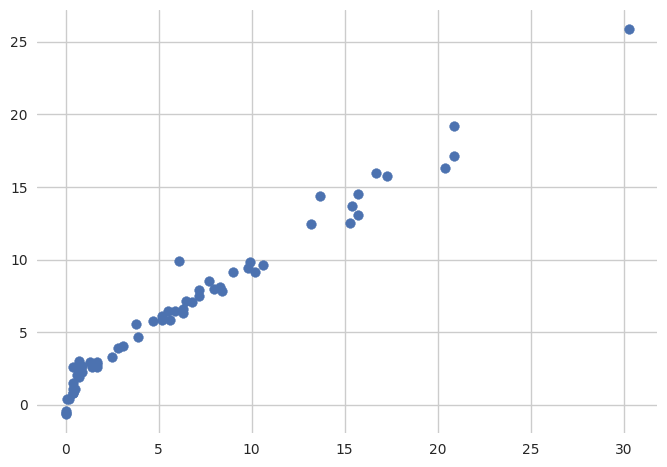

In [181]:
plt.scatter(Y_test, pred_y_lasso)

**3. Cross Validation Lasso**

[ 8.17490595  7.68312478 -0.25676525  4.72643402  6.78715772  1.77624325
  2.23148094  7.64057821  1.99176323  3.39941035  0.62808928  9.95945488
  9.36168319 16.98503659 18.28488762  1.61644108  1.62751276 -0.6415713
  7.28510526  3.10926518  1.95541903  0.18069335  6.47563129  0.14318503
 20.99597009  5.11755206  5.86208849  9.75914403 -0.77037467  9.91838577
  6.72277075 -0.31776007 10.31109643 14.4365551   1.71022677  0.83439752
  2.03414915  5.97488529 -0.6263644  -0.56200288  6.47253729  2.07971408
  8.46741557 -0.8464481  15.40443856  8.32941189  8.48782486  1.44030355
 13.02752812  1.20911545 29.08623849  5.49737681 17.15937199 19.28890096
 13.71102991 16.05355549  0.99056448  9.0873725   3.84455993 14.43991192
  5.23034139]
0.6199701158263433
Accuracy of the model is: 98.20946715928275


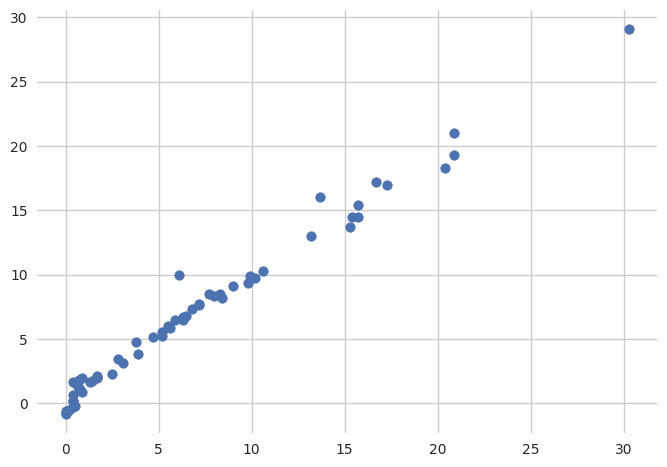

In [182]:
from sklearn.linear_model import LassoCV

lascv = LassoCV(cv = 5)

# fit the model
lascv.fit(X_train_scaled, Y_train)

# predict the model
pred_y_lascv = lascv.predict(X_test_scaled)

print(pred_y_lascv)


# find out the mean absolute error between actual output and predicted output
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y_lascv)

print(mae)


# find out the efficiency between actual output and predicted output

from sklearn.metrics import r2_score

acc = r2_score(Y_test, pred_y_lascv)

print("Accuracy of the model is:", (acc * 100.0))

plt.scatter(Y_test, pred_y_lascv)

**4. Ridge Regression**

In [183]:
from sklearn.linear_model import Ridge

ridge =   Ridge()


# train the model

ridge.fit(X_train_scaled, Y_train)

pred_y = ridge.predict(X_test_scaled)

print(pred_y)


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y)

print(mae)


from sklearn.metrics import r2_score

acc = r2_score(Y_test, pred_y)

print('Accuracy of the model is:', acc)

[ 8.23695957  7.77133489 -0.20576373  4.38641746  6.73014882  1.38083778
  2.09821574  7.89573609  1.68710448  3.39608166  0.45955107  9.77115691
  9.35289622 17.03184252 18.46891974  1.31920963  1.83197436 -0.12967473
  7.18616187  3.15029834  1.4415705   0.20532056  6.60901914  0.34619299
 20.97777968  5.22692975  5.97066219  9.82599838 -0.18171193  9.83698303
  6.65050786 -0.43256887 10.40995342 14.57517502  1.52182034  0.47799404
  2.09598786  6.18530003 -0.51720703 -0.27108924  6.74656177  1.8115675
  8.60302337 -0.34697492 15.41467762  8.34164636  8.27783782  1.41852757
 12.97837116  1.24905696 29.40913561  5.66093325 17.23898525 19.38721803
 13.82278407 16.19164908  0.70419803  9.05107798  3.6760472  14.63186999
  5.27050843]
0.5642305340105692
Accuracy of the model is: 0.9842993364555513


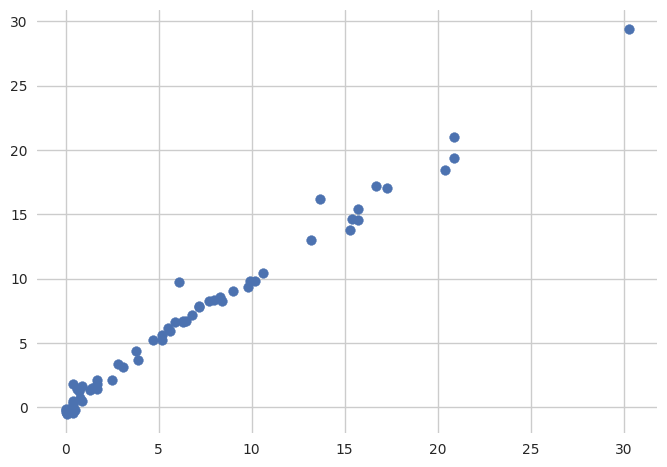

In [184]:
plt.scatter(Y_test, pred_y)

**5. RidgeCV**

[ 8.23695957  7.77133489 -0.20576373  4.38641746  6.73014882  1.38083778
  2.09821574  7.89573609  1.68710448  3.39608166  0.45955107  9.77115691
  9.35289622 17.03184252 18.46891974  1.31920963  1.83197436 -0.12967473
  7.18616187  3.15029834  1.4415705   0.20532056  6.60901914  0.34619299
 20.97777968  5.22692975  5.97066219  9.82599838 -0.18171193  9.83698303
  6.65050786 -0.43256887 10.40995342 14.57517502  1.52182034  0.47799404
  2.09598786  6.18530003 -0.51720703 -0.27108924  6.74656177  1.8115675
  8.60302337 -0.34697492 15.41467762  8.34164636  8.27783782  1.41852757
 12.97837116  1.24905696 29.40913561  5.66093325 17.23898525 19.38721803
 13.82278407 16.19164908  0.70419803  9.05107798  3.6760472  14.63186999
  5.27050843]
0.5642305340105692
Accuracy of the model is: 0.9842993364555513


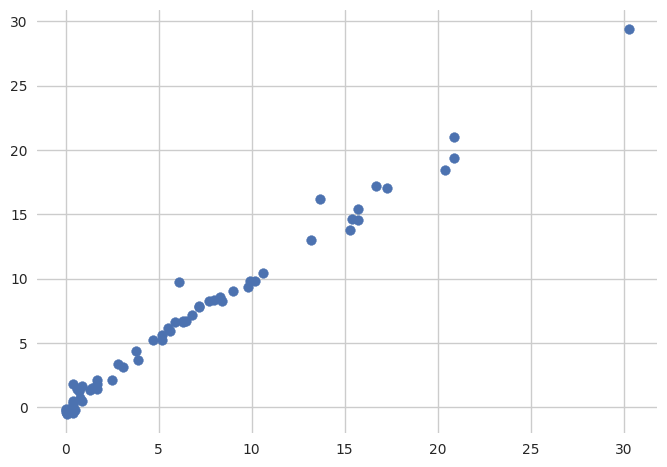

In [185]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv = 5)

ridgecv.fit(X_train_scaled, Y_train)

pred_y_ridcv = ridgecv.predict(X_test_scaled)

print(pred_y_ridcv)


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y)

print(mae)


from sklearn.metrics import r2_score

acc = r2_score(Y_test, pred_y)

print("Accuracy of the model is:", acc)

plt.scatter(Y_test, pred_y)

**6. ElasticNet Regression:**



Mean Absolute Error is: 1.8822353634896005
R2 Score is: 87.53460589519703


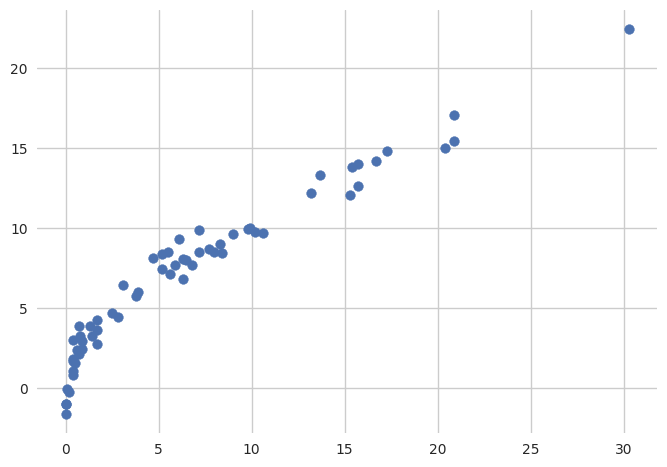

In [186]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

elastic.fit(X_train_scaled, Y_train)

pred_y = elastic.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y)

from sklearn.metrics import r2_score

score = (r2_score(Y_test, pred_y))*100.0


print("Mean Absolute Error is:", mae)

print("R2 Score is:", score)

plt.scatter(Y_test, pred_y)

**7. ElasticNet CV**

Mean Absolute Error is: 0.6575946731430898
R2 Score is: 98.14217587854941


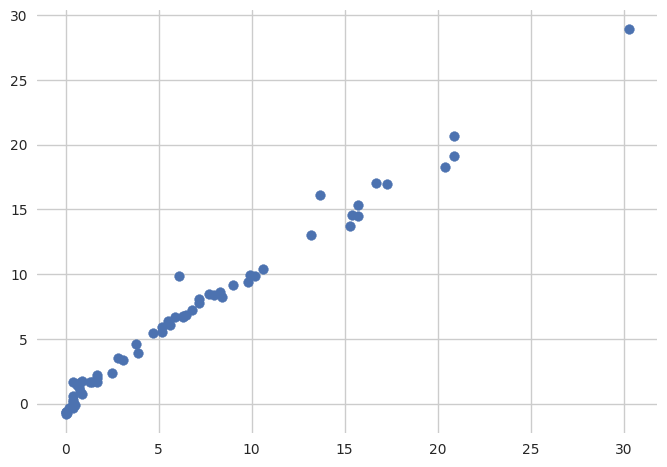

In [187]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV()

elasticcv.fit(X_train_scaled, Y_train)

pred_y = elasticcv.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, pred_y)

from sklearn.metrics import r2_score

score = (r2_score(Y_test, pred_y))*100.0


print("Mean Absolute Error is:", mae)

print("R2 Score is:", score)

plt.scatter(Y_test, pred_y)

In [188]:
print(elasticcv.alphas_)

[1.41170600e+01 1.31656174e+01 1.22782989e+01 1.14507826e+01
 1.06790382e+01 9.95930678e+00 9.28808283e+00 8.66209714e+00
 8.07830078e+00 7.53385034e+00 7.02609405e+00 6.55255882e+00
 6.11093829e+00 5.69908150e+00 5.31498248e+00 4.95677045e+00
 4.62270071e+00 4.31114616e+00 4.02058933e+00 3.74961507e+00
 3.49690356e+00 3.26122397e+00 3.04142839e+00 2.83644629e+00
 2.64527931e+00 2.46699633e+00 2.30072904e+00 2.14566760e+00
 2.00105679e+00 1.86619226e+00 1.74041714e+00 1.62311885e+00
 1.51372607e+00 1.41170600e+00 1.31656174e+00 1.22782989e+00
 1.14507826e+00 1.06790382e+00 9.95930678e-01 9.28808283e-01
 8.66209714e-01 8.07830078e-01 7.53385034e-01 7.02609405e-01
 6.55255882e-01 6.11093829e-01 5.69908150e-01 5.31498248e-01
 4.95677045e-01 4.62270071e-01 4.31114616e-01 4.02058933e-01
 3.74961507e-01 3.49690356e-01 3.26122397e-01 3.04142839e-01
 2.83644629e-01 2.64527931e-01 2.46699633e-01 2.30072904e-01
 2.14566760e-01 2.00105679e-01 1.86619226e-01 1.74041714e-01
 1.62311885e-01 1.513726

In [189]:
print(pred_y)

[ 8.26896303  7.80499035 -0.10373519  4.5910001   6.88725274  1.59410811
  2.35512483  8.0623476   1.72415002  3.53713054  0.6324586   9.86752845
  9.43037004 16.93741658 18.24537235  1.65750426  1.70187606 -0.64660717
  7.25494999  3.39769372  1.6585457   0.11316128  6.66222016  0.2768868
 20.66780763  5.47501303  6.05587139  9.84868106 -0.65326652  9.93266416
  6.72851251 -0.29425171 10.39747097 14.48835483  1.70083377  0.73634118
  2.25453683  6.37570352 -0.71507088 -0.36129277  6.8083341   1.96274355
  8.60448104 -0.79781122 15.32067065  8.39541208  8.43742252  1.41818555
 13.00237268  1.28988758 28.93275959  5.88819725 17.04972357 19.1125176
 13.71477759 16.09820311  0.99493652  9.16486312  3.91448039 14.57731138
  5.50092909]


In [190]:
print(Y_test)

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64


**OBSERVATIONS:**
(i) From the above algorithms, we can see that Linear, Ridge and RidgeCV are best suited for the model as
  
*   mean absolute error is very low.
*   R2 Score value is very high.



**Pickle the Machine Learning Model, preprocessing Standard Scaler Model:**

In [191]:
import pickle

# dump the standard scaler model into the file
pickle.dump(sc, open('sc.pkl','wb'))

# dump the ridge model into the file.
pickle.dump(ridge, open('Ridge.pkl','wb'))

In [192]:
# Load the standard model from the file

files_data = pickle.load(open('sc.pkl','rb'))

In [193]:
print(files_data)

StandardScaler()


In [194]:
# Load the Ridge model from the file

ridge_data = pickle.load(open('Ridge.pkl','rb'))

In [195]:
print(ridge_data)

Ridge()
